In [198]:
from gensim.models import KeyedVectors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

__Match lemmas with ASENT__

In [148]:
lemmas = pd.read_csv('../lemmas/lemma-30k-2017.txt', sep = "\t", header = None)

In [149]:
lemmas = lemmas.rename(columns={0: "POS", 1: "word", 2: "freq"})

In [150]:
lemmas

,POS,word,freq
0,T,i,3.224048e-02
1,V,være,3.093546e-02
2,C,og,2.960070e-02
3,P,en,2.535859e-02
4,P,den,2.485305e-02
...,...,...,...
299995,U,dader,5.558718e-09
299996,A,dadurchøjre,5.558718e-09
299997,NC,daekpris,5.558718e-09
299998,NC,dagangreb,5.558718e-09


In [151]:
lemmas = lemmas.sort_values(["freq"], ascending = False)

In [152]:
lemmas = lemmas[:10000]

In [153]:
# Remove irrelevant POS 
pos_tags = ["A", "D", "NC", "V", "I"]
lemmas_relevant = lemmas[lemmas['POS'].isin(pos_tags)]

In [154]:
lemmas_relevant

,POS,word,freq
1,V,være,0.030935
10,V,have,0.014103
16,D,ikke,0.009251
17,V,kunne,0.006838
18,V,blive,0.006401
...,...,...,...
9995,NC,omløb,0.000004
9996,NC,regentpar,0.000004
9997,NC,agenda,0.000004
9998,NC,efterspil,0.000004


__Match__

In [121]:
# read asent
asent = pd.read_csv("../asent/da_lexicon.csv")

In [123]:
lemmas_noasent = lemmas_relevant[~lemmas_relevant['word'].isin(asent["word"].tolist())]

In [124]:
lemmas_noasent

,POS,word,freq
0,T,i,0.032240
1,V,være,0.030935
2,C,og,0.029601
3,P,en,0.025359
4,P,den,0.024853
...,...,...,...
19993,I,jovist,0.000001
19992,V,gennemprøve,0.000001
19991,NC,erstatningsansvar,0.000001
19990,NC,brændselscelle,0.000001


__Find word embeddings for lemmas__

In [135]:
word2vec = KeyedVectors.load_word2vec_format('../../DAGW-model-300dm.bin', binary=True)

In [136]:
word2vec_dict = dict({})
for idx, key in enumerate(word2vec.key_to_index):
    word2vec_dict[key] = word2vec[key]

In [158]:
embeddings_to_predict = np.zeros(len(lemmas_noasent))

In [162]:
embeddings_to_predict = []
words_to_predict = []

for idx, row in lemmas_noasent.iterrows():
    # get word from lemma df
    word = row["word"]
    # get embedding of corresponding word
    if word in word2vec_dict:
        embedding = word2vec_dict[word]
        # append word to word list
        words_to_predict.append(word)
        # append embedding to embedding list
        embeddings_to_predict.append(embedding)

__Convert to array and save__

In [165]:
embeddings_array = np.array(embeddings_to_predict)

In [169]:
words_array = np.array(words_to_predict)

In [170]:
np.save("../output/X_array_embeds_to_predict.npy", embeddings_array)

In [171]:
np.save("../output/X_array_words_to_predict.npy", words_array)

In [187]:
sentiment_predictions = pd.read_csv("../output/sentiment_predictions.csv")

In [188]:
sentiment_predictions.sort_values("predicted_sentiment", ascending = True)

,Unnamed: 0,word,predicted_sentiment,restricted_sentiments
2931,2931,indland,-6.490899,-5.000000
4202,4202,flyrejse,-5.140041,-5.000000
7811,7811,torden,-4.624526,-4.624526
9212,9212,lydbog,-4.616482,-4.616482
3746,3746,grundskyld,-4.417791,-4.417791
...,...,...,...,...
4337,4337,tilvejebringe,4.641769,4.641768
1622,1622,udveksle,4.728841,4.728841
3166,3166,ejendomsret,4.832168,4.832168
12188,12188,personoplysning,5.025722,5.000000


In [196]:
freq_preds = lemmas_noasent[lemmas_noasent['word'].isin(words_to_predict)]
sentiment_predictions["freq"] = freq_preds["freq"].tolist()

In [197]:
sentiment_predictions

,Unnamed: 0,word,predicted_sentiment,restricted_sentiments,freq
0,0,være,0.075997,0.075997,0.030935
1,1,og,1.065916,1.065916,0.029601
2,2,en,-0.034691,-0.034691,0.025359
3,3,den,-0.255576,-0.255576,0.024853
4,4,på,-0.744279,-0.744280,0.015318
...,...,...,...,...,...
12779,12779,klarinettist,-0.495826,-0.495826,0.000001
12780,12780,jovist,-0.868193,-0.868193,0.000001
12781,12781,gennemprøve,0.409137,0.409137,0.000001
12782,12782,brændselscelle,-0.515832,-0.515832,0.000001


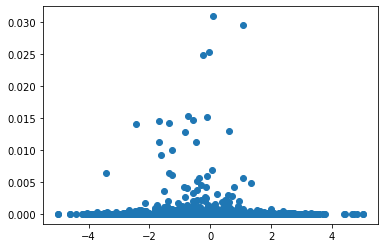

In [201]:
plt.plot(sentiment_predictions["restricted_sentiments"], sentiment_predictions["freq"], marker="o", linestyle = "")

In [186]:
np.mean(sentiment_predictions["predicted_sentiment"])

-0.053233399896836654